In [1]:
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import sys
import os,fnmatch
import matplotlib as mpl
import matplotlib.cm as cm


/home/osboxes/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/osboxes/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/osboxes/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/osboxes/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/osboxes/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarn

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline

**Define columns**

In [3]:

file_cols=["start_time","end_time","calories_kcal","distance_m","low_latitude_deg","low_longitude_deg","high_latitude_deg","high_longitude_deg","average_speed_ms","max_speed_ms","min_speed_ms","step_count","average_weight_kg","max_weight_kg","min_weight_kg","move_minutes_count","inactive_duration_ms","walking_duration_ms","running_duration_ms"] 

1. **Load each file into to a dataframe**
2. **Append a datetime column using date from file**
3. **Append all dataframes in to one**

In [4]:
df_by_day = []
for daily_file in fnmatch.filter(os.listdir(os.getcwd()+"/daily_aggregations"),"*.csv"):
    df_raw = pd.read_csv(os.getcwd()+"/daily_aggregations/"+daily_file,skiprows=1,names=file_cols,parse_dates=False)
    df_raw["activity_dttm"] = pd.to_datetime(daily_file.split(".")[0]+" "+df_raw["start_time"].str[:8]).dt.floor('h')
    df_by_day.append(df_raw[["activity_dttm","calories_kcal","distance_m","step_count","walking_duration_ms"]])

df_activities = pd.concat(df_by_day).fillna(0)
df_activities


,activity_dttm,calories_kcal,distance_m,step_count,walking_duration_ms
0,2018-11-13 00:00:00,15.958333,0.000000,0.0,0.0
1,2018-11-13 00:00:00,15.958333,0.000000,0.0,0.0
2,2018-11-13 00:00:00,15.958333,0.000000,0.0,0.0
3,2018-11-13 00:00:00,15.958333,0.000000,0.0,0.0
4,2018-11-13 01:00:00,15.958333,0.000000,0.0,0.0
...,...,...,...,...,...
91,2019-07-14 22:00:00,15.645832,0.000000,3.0,0.0
92,2019-07-14 23:00:00,15.645834,0.000000,6.0,0.0
93,2019-07-14 23:00:00,19.368160,52.506058,108.0,68434.0
94,2019-07-14 23:00:00,15.645834,0.000000,0.0,0.0


**Group by Month and Date to plot a box plot and Violin Plot**

In [6]:
df_monthly_group = df_activities.groupby([df_activities['activity_dttm'].values.astype('datetime64[M]'),df_activities['activity_dttm'].values.astype('datetime64[D]')]).sum()
df_monthly_group

calories_kcal   distance_m  step_count  \
2017-08-01 2017-08-05     188.687624     0.000000        56.0   
           2017-08-06    1546.803292  3056.275073      5986.0   
           2017-08-07    1874.039721  1860.814267     10933.0   
           2017-08-08    1764.701911  1860.065835     10343.0   
           2017-08-09    1964.228067  1172.955108     12847.0   
...                              ...          ...         ...   
2020-03-01 2020-03-31    1709.613444  3162.486385      4914.0   
2020-04-01 2020-04-01    1551.420269    67.331299       240.0   
           2020-04-02    1572.039600   494.934723      1237.0   
           2020-04-03    1553.168320   146.399247       480.0   
           2020-04-04    1058.157589    49.417467       185.0   

                       walking_duration_ms  
2017-08-01 2017-08-05                  0.0  
           2017-08-06            3687308.0  
           2017-08-07            4448754.0  
           2017-08-08            4545619.0  
           2017-08-09            7099089.0  
...                                    ...  
2020-03-01 2020-03-31            2926147.0  
2020-04-01 2020-04-01             197022.0  
           2020-04-02             552744.0  
           2020-04-03             227180.0  
           2020-04-04             133401.0  

[930 rows x 4 columns]

**Replace multilevel index with month to use as the category for box plot**

In [7]:
df_monthly_group.index = df_monthly_group.index.get_level_values(0)
df_monthly_group

,calories_kcal,distance_m,step_count,walking_duration_ms
2017-08-01,188.687624,0.000000,56.0,0.0
2017-08-01,1546.803292,3056.275073,5986.0,3687308.0
2017-08-01,1874.039721,1860.814267,10933.0,4448754.0
2017-08-01,1764.701911,1860.065835,10343.0,4545619.0
2017-08-01,1964.228067,1172.955108,12847.0,7099089.0
...,...,...,...,...
2020-03-01,1709.613444,3162.486385,4914.0,2926147.0
2020-04-01,1551.420269,67.331299,240.0,197022.0
2020-04-01,1572.039600,494.934723,1237.0,552744.0
2020-04-01,1553.168320,146.399247,480.0,227180.0


1. **Scale down step count by 1000 and normalise value within 2000 and 15000 steps**
2. **Filter for 2019**

In [8]:
df_monthly_group["month"] = df_monthly_group.index.month
df_monthly_group['step_count_k'] = df_monthly_group['step_count'].apply(lambda x : np.floor(x/1000) if np.floor(x/1000) <= 15 else 15)
df_monthly_group['step_count_k'] = df_monthly_group['step_count_k'].apply(lambda x : x if x >= 2 else 2)

df_monthly_group_2019=df_monthly_group["2019"]
df_monthly_group_2019

,calories_kcal,distance_m,step_count,walking_duration_ms,month,step_count_k
2019-01-01,1411.181309,1744.183170,4820.0,0.0,1,4.0
2019-01-01,1827.548948,6963.532161,14552.0,6479152.0,1,14.0
2019-01-01,1691.583602,709.848482,4526.0,81941573.0,1,4.0
2019-01-01,2109.482483,8255.541242,18062.0,11582262.0,1,15.0
2019-01-01,1901.632692,4418.090304,10384.0,66606086.0,1,10.0
...,...,...,...,...,...,...
2019-12-01,1555.004822,74.126200,357.0,50850.0,12,2.0
2019-12-01,1738.536655,2727.386804,5078.0,3156689.0,12,5.0
2019-12-01,1965.183119,5844.091932,11022.0,6992133.0,12,11.0
2019-12-01,1831.739049,4494.411021,8696.0,4733914.0,12,8.0


**Render box plot for steps by month**

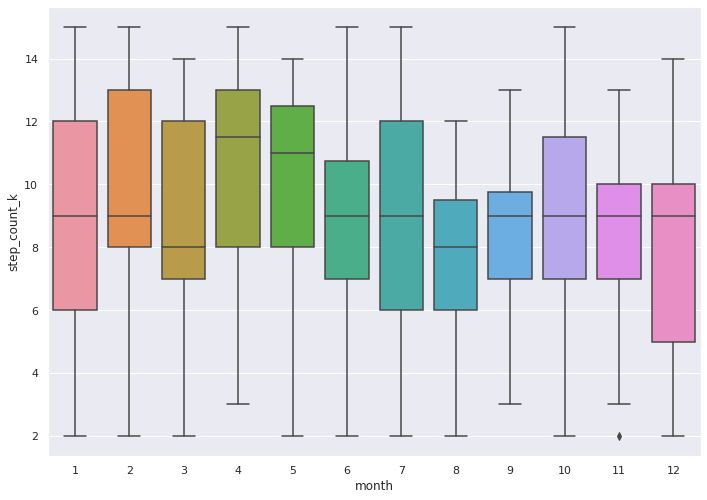

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=df_monthly_group_2019["month"],y=df_monthly_group_2019["step_count_k"])

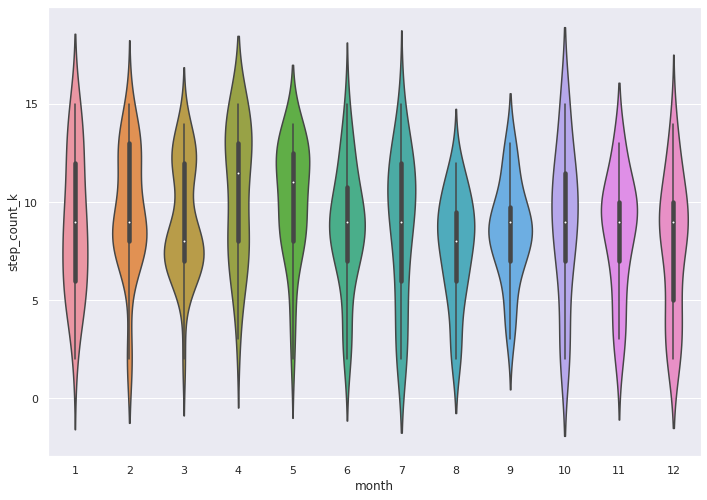

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x=df_monthly_group_2019["month"],y=df_monthly_group_2019["step_count_k"])

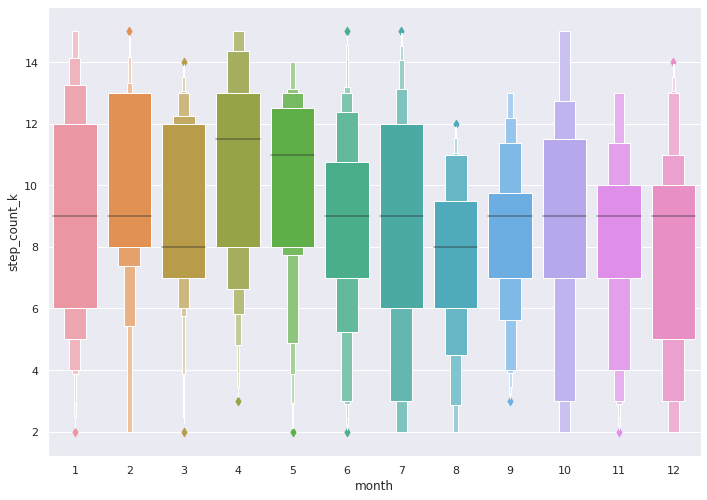

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=df_monthly_group_2019["month"],y=df_monthly_group_2019["step_count_k"])

**Create Heatmap of hourly activity for a week**

In [15]:
df_activities["hour"] = df_activities.activity_dttm.dt.hour
df_activities["date"] =  df_activities.activity_dttm.dt.date
df_activities

,activity_dttm,calories_kcal,distance_m,step_count,walking_duration_ms,wday,hour,date
0,2018-11-13 00:00:00,15.958333,0.000000,0.0,0.0,Tue,0,2018-11-13
1,2018-11-13 00:00:00,15.958333,0.000000,0.0,0.0,Tue,0,2018-11-13
2,2018-11-13 00:00:00,15.958333,0.000000,0.0,0.0,Tue,0,2018-11-13
3,2018-11-13 00:00:00,15.958333,0.000000,0.0,0.0,Tue,0,2018-11-13
4,2018-11-13 01:00:00,15.958333,0.000000,0.0,0.0,Tue,1,2018-11-13
...,...,...,...,...,...,...,...,...
91,2019-07-14 22:00:00,15.645832,0.000000,3.0,0.0,Sun,22,2019-07-14
92,2019-07-14 23:00:00,15.645834,0.000000,6.0,0.0,Sun,23,2019-07-14
93,2019-07-14 23:00:00,19.368160,52.506058,108.0,68434.0,Sun,23,2019-07-14
94,2019-07-14 23:00:00,15.645834,0.000000,0.0,0.0,Sun,23,2019-07-14


**Select a week from 2019**

In [24]:
# Day 43,46,50=heavy,52 = Light
df_2019_wk = df_activities[ (df_activities.activity_dttm.dt.week==46 ) & (df_activities.activity_dttm.dt.year==2019) ]
df_2019_wk

,activity_dttm,calories_kcal,distance_m,step_count,walking_duration_ms,wday,hour,date
0,2019-11-15 00:00:00,16.166664,0.0,0.0,0.0,Fri,0,2019-11-15
1,2019-11-15 00:00:00,16.166664,0.0,0.0,0.0,Fri,0,2019-11-15
2,2019-11-15 00:00:00,16.166664,0.0,0.0,0.0,Fri,0,2019-11-15
3,2019-11-15 00:00:00,16.166664,0.0,0.0,0.0,Fri,0,2019-11-15
4,2019-11-15 01:00:00,16.166664,0.0,0.0,0.0,Fri,1,2019-11-15
...,...,...,...,...,...,...,...,...
91,2019-11-11 22:00:00,16.166666,0.0,0.0,0.0,Mon,22,2019-11-11
92,2019-11-11 23:00:00,16.166666,0.0,0.0,0.0,Mon,23,2019-11-11
93,2019-11-11 23:00:00,16.166666,0.0,0.0,0.0,Mon,23,2019-11-11
94,2019-11-11 23:00:00,16.166666,0.0,0.0,0.0,Mon,23,2019-11-11


**Create a Pivot table for each day and hour**

In [25]:
weekly_timewheel_data = pd.pivot_table(df_2019_wk,index=["date"],columns=["hour"],values=["step_count"],aggfunc=[np.sum])
weekly_timewheel_data.columns = [  column_name[2] for column_name in weekly_timewheel_data.columns ]
weekly_timewheel_data.index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
weekly_timewheel_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Mon,6.0,2.0,4.0,4.0,7.0,1.0,180.0,682.0,377.0,24.0,...,115.0,272.0,76.0,205.0,303.0,110.0,194.0,144.0,92.0,0.0
Tue,1.0,14.0,0.0,20.0,13.0,3.0,3.0,503.0,314.0,3548.0,...,812.0,1225.0,131.0,742.0,684.0,2740.0,54.0,269.0,12.0,0.0
Wed,2.0,1.0,46.0,2.0,0.0,1.0,0.0,1.0,1290.0,1045.0,...,283.0,138.0,1399.0,838.0,337.0,166.0,321.0,4.0,34.0,0.0
Thu,0.0,0.0,0.0,0.0,0.0,0.0,9.0,20.0,809.0,1370.0,...,2238.0,178.0,208.0,1577.0,71.0,507.0,693.0,29.0,14.0,0.0
Fri,0.0,0.0,0.0,0.0,0.0,0.0,72.0,27.0,675.0,1244.0,...,251.0,341.0,1989.0,702.0,343.0,13.0,0.0,0.0,134.0,26.0
Sat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,156.0,1290.0,...,504.0,2296.0,692.0,1350.0,1790.0,324.0,48.0,112.0,126.0,104.0
Sun,0.0,7.0,45.0,0.0,12.0,4.0,62.0,265.0,61.0,122.0,...,387.0,597.0,0.0,22.0,196.0,295.0,365.0,201.0,263.0,173.0


In [26]:
def pie_heatmap(table, cmap=cm.hot, vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=1.1*vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)




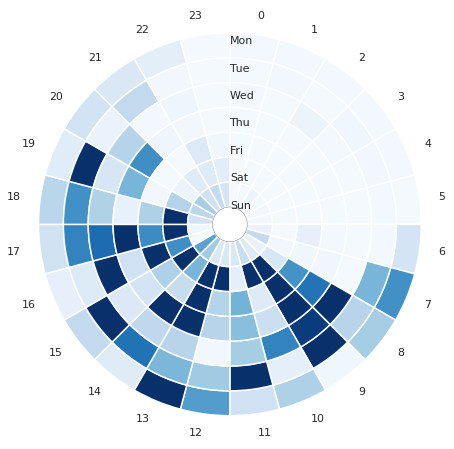

In [27]:
plt.figure(figsize=(8,8))
pie_heatmap(weekly_timewheel_data, vmin=-20,vmax=1000,inner_r=0.1)

plt.show();